<a href="https://colab.research.google.com/github/ajayrajput86/Course/blob/master/bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing all required lib
2. Reading raw data file and data cleaning
  - check for null value
  - check unique value in each column 
  - checking data type
  - Renaming few columns for better understanding and recaling feature name 
  - Dropping redundent columns
  - check data size 

3. Checking any outlier , as all max and min value of continues variable lie between (mean +- 3*std)  , eleminate posibility of outlier  

4. EDA : Exploratory data Analysis  and Inference 
5. Encoding/mapping the catagorical column
6.Dummy data creation for catagorical variable
7. Data prepdation for model input 
  - Split dat into train and test
  - Data scaling with min max on continues variable

8. Feature engineering
    - Recursive feature elimination  for feature selection
    - Ordinary least squares model building 
    - Calculate VIF 
    - Remove feature based on P value and VIF for model tuning 
9.Check for co-efficent agaist each feature
10.Residual Analysis
	  - Checking Homoscedasticity with train data result
	  - R2 and Adjested_R2
11. Predictions of test variable Using the developed Model
	  - scaling Min Max test data
	  - Preparing input for model 
	  - predicting target variable 
	  - Checking Homoscedasticity with test result
  - y_test and y_pred spread
12. Result accuracy prediction
  - Calculation of R2_test and Adj_R2_test for test result



In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
import warnings
warnings.filterwarnings(action="ignore")

In [273]:
# importing required libreries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reading raw data file and data cleaning 

In [ ]:

Bike=pd.read_csv("/content/drive/MyDrive/upgrad/Linear Regression/Bike project/day.csv")

Bike.head(10)

In [ ]:
# check for null value
Bike.isnull().sum()

In [ ]:
#check unique value in each column
Bike.nunique()

In [ ]:
# check data type 
Bike.info()

In [278]:
# renaming few columns for better understanding and recaling feature name 

Bike.rename(columns={'mnth':'month','hum':'humidity'}, inplace=True)


In [279]:
#Dropping redundent columns
#copy DataFrame ,to let orignal data as it is 
data=Bike.drop(['instant',"casual","registered","dteday"], axis=1 )

In [280]:
# checking the shape of new dataframe
data.shape

(730, 12)

In [277]:
#checking any outlier , as all max and min value of continues variable lie between (mean +- 3*std)  , eleminate posibility of outlier  
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


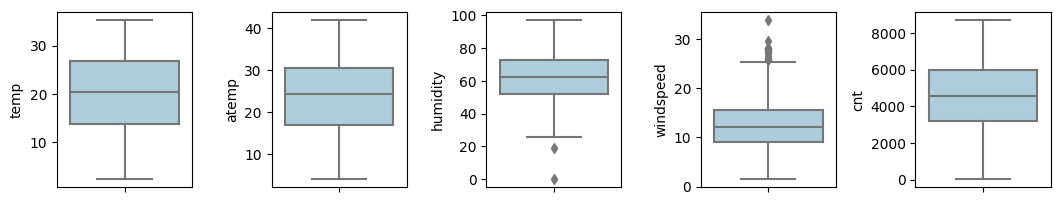

In [282]:

#filtering continuous variable 
Cont_var=["temp","atemp","humidity","windspeed",	"cnt"]
#checking outlier in continuous variable
plt.figure(figsize=(15,10))
for i in enumerate(Cont_var):    
   plt.subplot(5,7,i[0]+1)    
   sns.boxplot(y=i[1],data=data,palette="Paired")
   plt.tight_layout() 

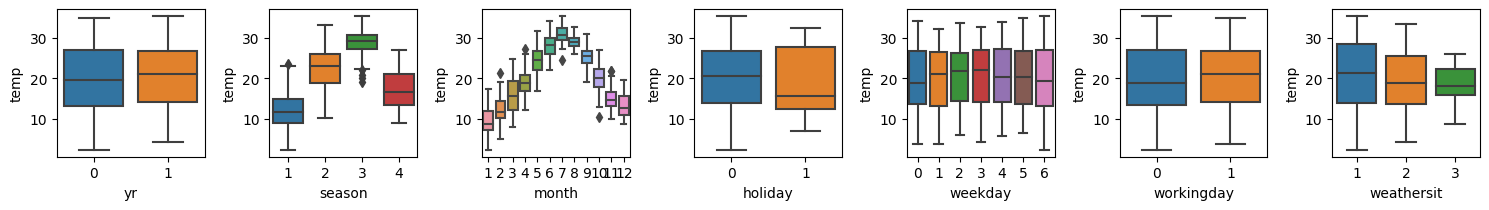

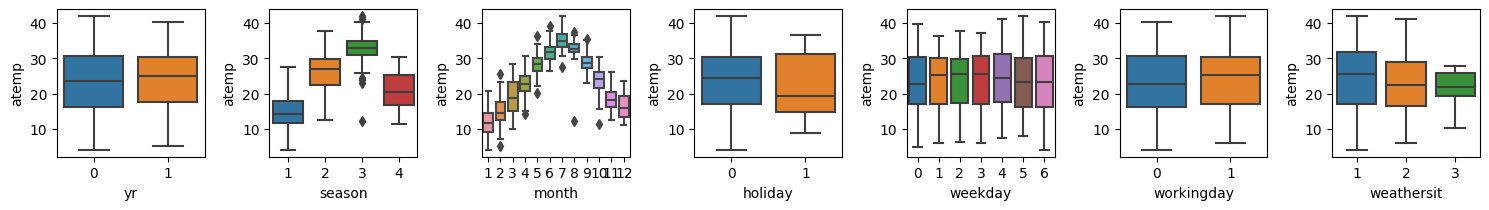

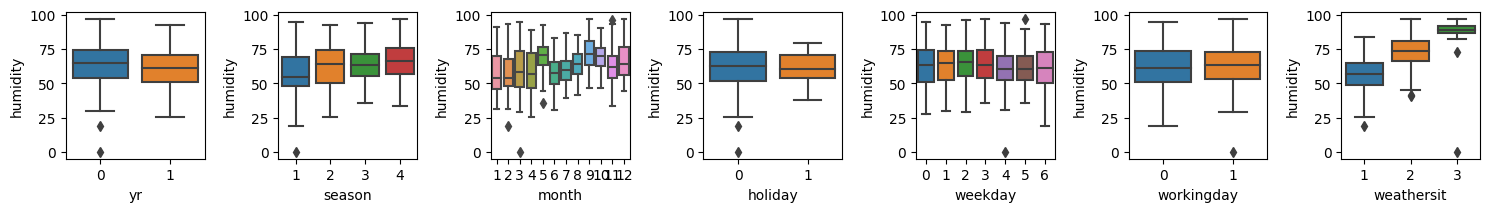

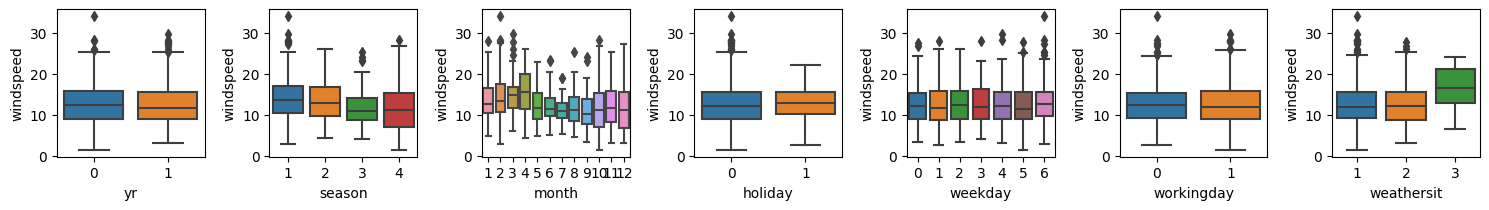

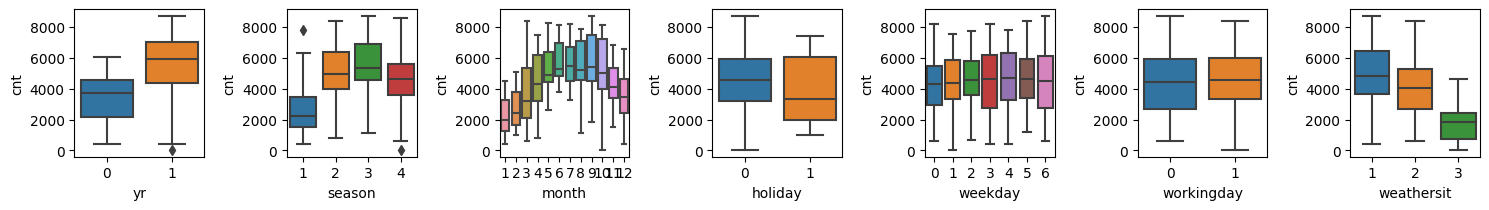

In [283]:

#filtering cat variable 
cat_var=["yr","season","month","holiday","weekday","workingday","weathersit"]
for j in  Cont_var:
  plt.figure(figsize=(15,10))
  for i in enumerate(cat_var):    
    plt.subplot(5,7,i[0]+1)    
    sns.boxplot(y=j,x=i[1],data=data)
    plt.tight_layout() 

1. Season 3has highest demand.
2. demand next year is up
3. Year start and end has low demand and mid month has high demand
6. The clear weathershit got good correlation


In [284]:
# Encoding/mapping the season column
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Encoding/mapping the month column
data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the weekday column
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Encoding/mapping the weathersit column
data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

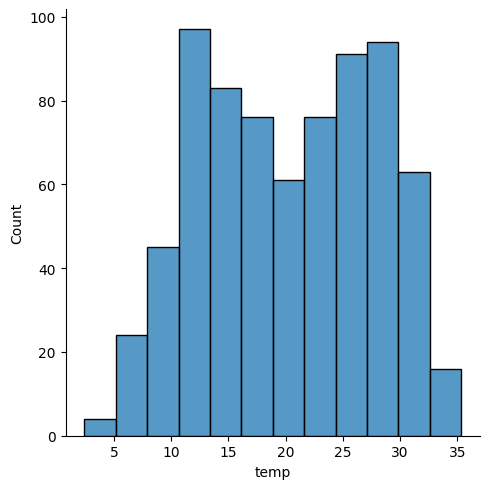

1


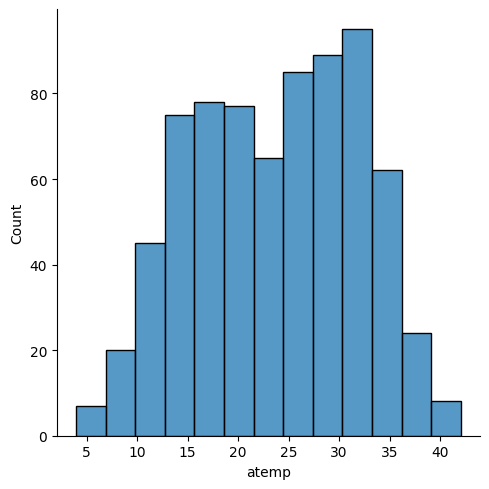

2


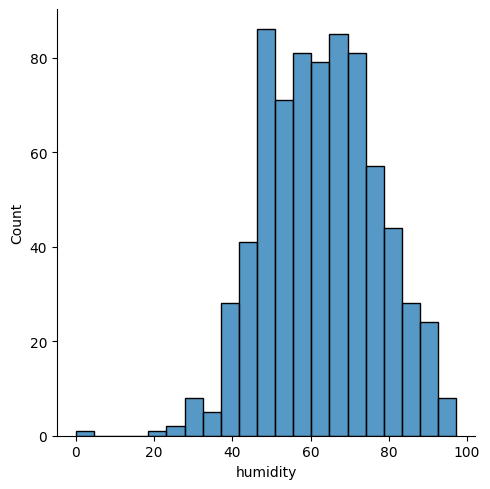

3


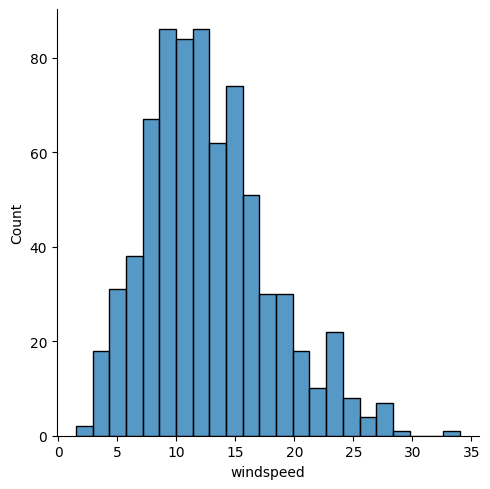

4


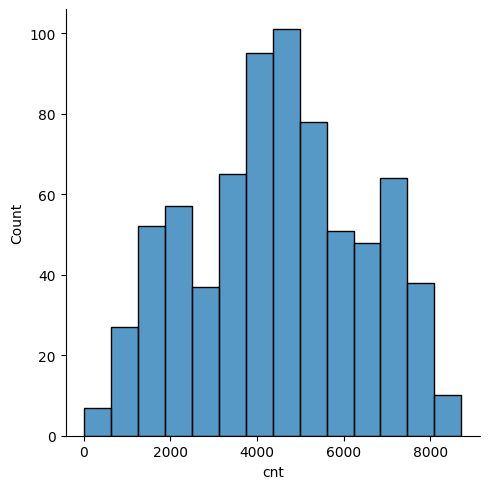

5


In [286]:
#Checking normal disntribution on continous variables

j=1
for i in Cont_var:
  sns.displot(data, x=i)
  plt.show()
  print(j)
  j=j+1



<Figure size 1500x1500 with 0 Axes>

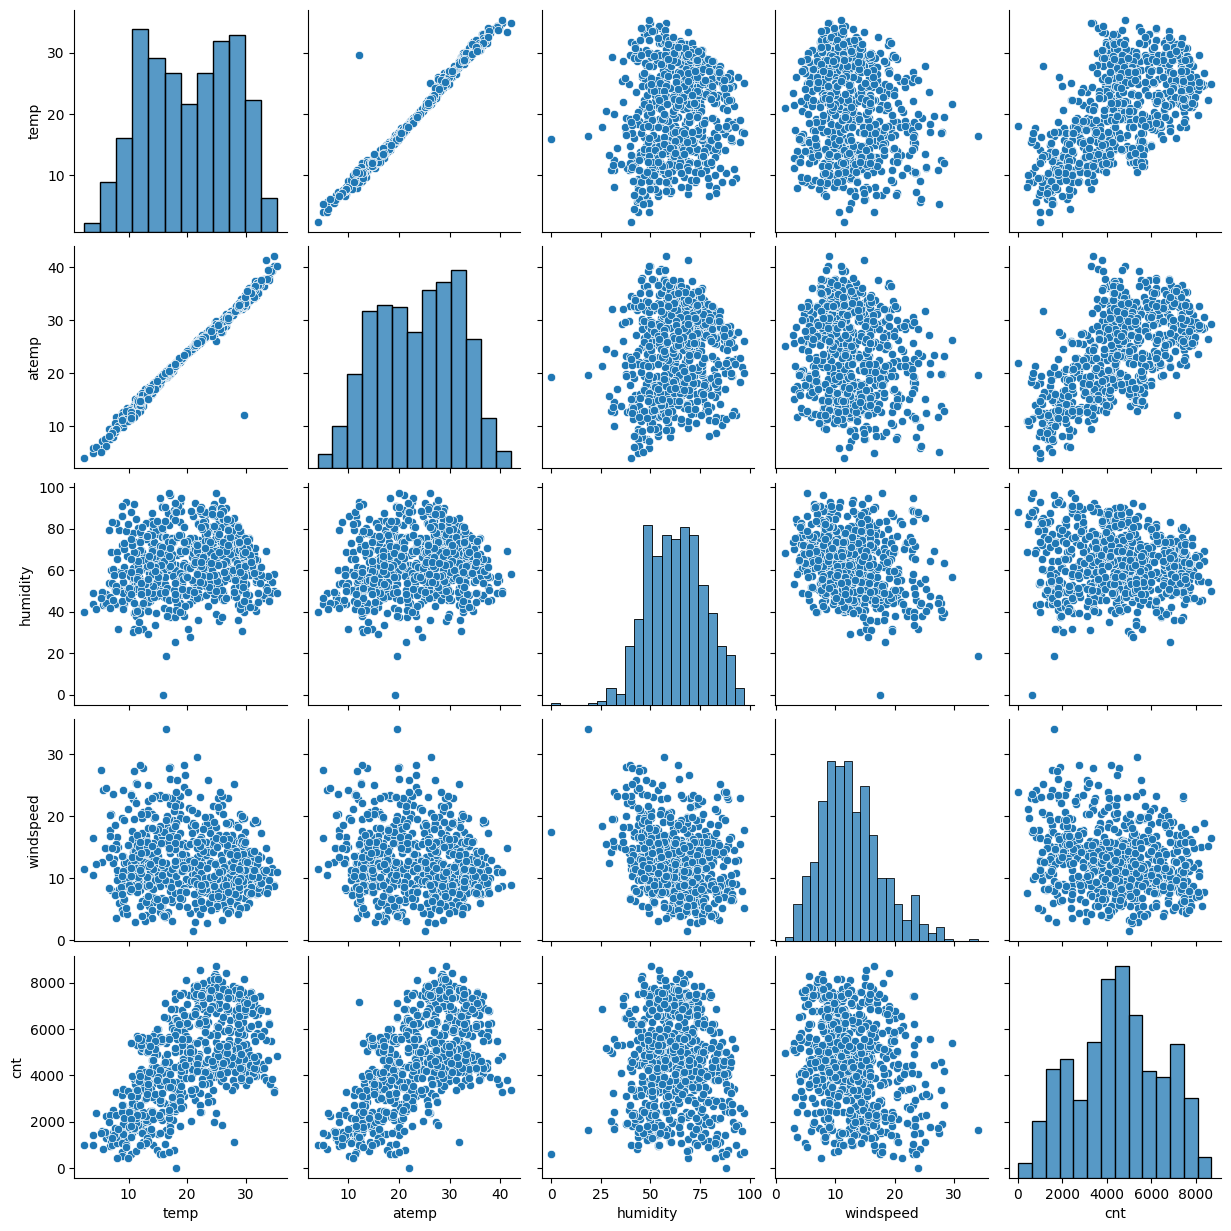

In [287]:
# checking correlation through relational plot
plt.figure(figsize=(15,15))
sns.pairplot(data[Cont_var])
plt.show()

 temp and atemp has the highest corelation . Both of the parameters cannot be use

We will check VIF and p-value w.r.t other variables, to decided which one need to drop.

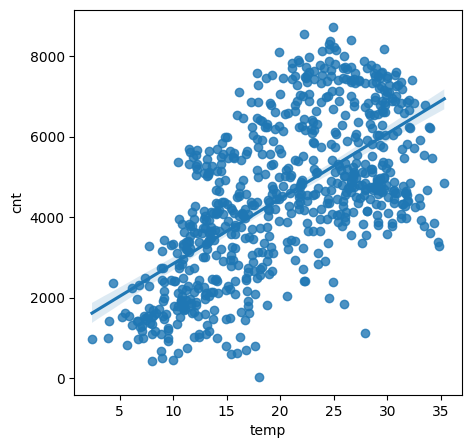

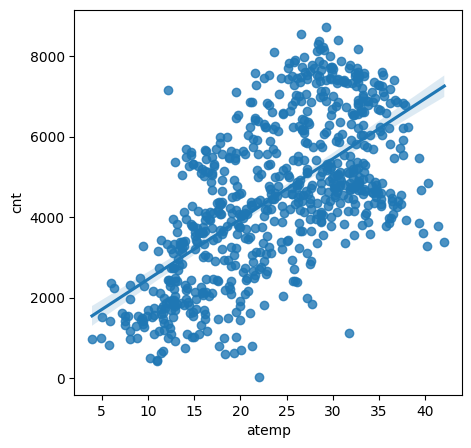

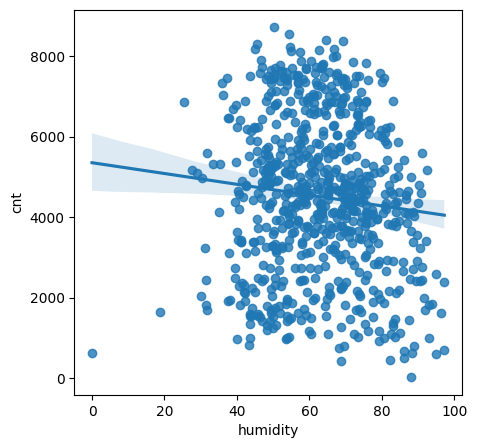

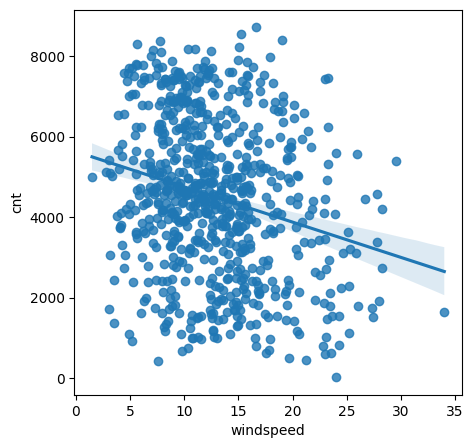

In [288]:
j=1

for i in range(4):  
  plt.figure(figsize=(5,5))  
  sns.regplot(data=data[Cont_var],y="cnt",x=data[Cont_var].columns[i])
  plt.xlabel(data[Cont_var].columns[i])
  plt.show()

#Inference:
Demand for bikes is positively correlated to temp.


Although we can see cnt decreasing with increase in humidity.


cnt decreasing with increase in windspeed.

<Axes: >

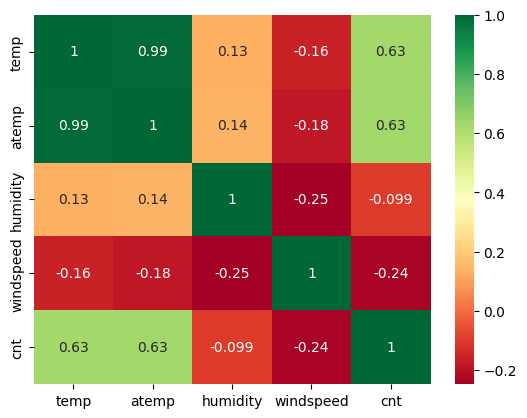

In [289]:

corelation=data[Cont_var].corr().sort_values("cnt",ascending=False)

sns.heatmap(data[Cont_var].corr(), annot = True, cmap="RdYlGn")

#Data Preparation

In [292]:

# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(data.month,drop_first=True)

weekdays_df=pd.get_dummies(data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(data.season,drop_first=True)

# Merging  the dataframe, with the dummy variable dataset. 
data = pd.concat([data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

# dropping columns after ceating dummy variable  
data.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)



## Splitting data 

In [293]:

x_train,x_test=train_test_split(data,train_size=0.7,random_state=100)
x_train.shape,x_test.shape


((510, 30), (220, 30))

In [294]:
# data scaling with min max 
#Use Normalized scaler to scale
scaler = MinMaxScaler()
x_train[Cont_var] = scaler.fit_transform(x_train[Cont_var])
x_train[Cont_var]


,temp,atemp,humidity,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095
...,...,...,...,...,...
578,0.863973,0.824359,0.679690,0.187140,0.832835
53,0.202618,0.218747,0.435939,0.111379,0.218017
350,0.248216,0.223544,0.577930,0.431816,0.312586
79,0.462664,0.434043,0.759870,0.529881,0.236424


<Axes: >

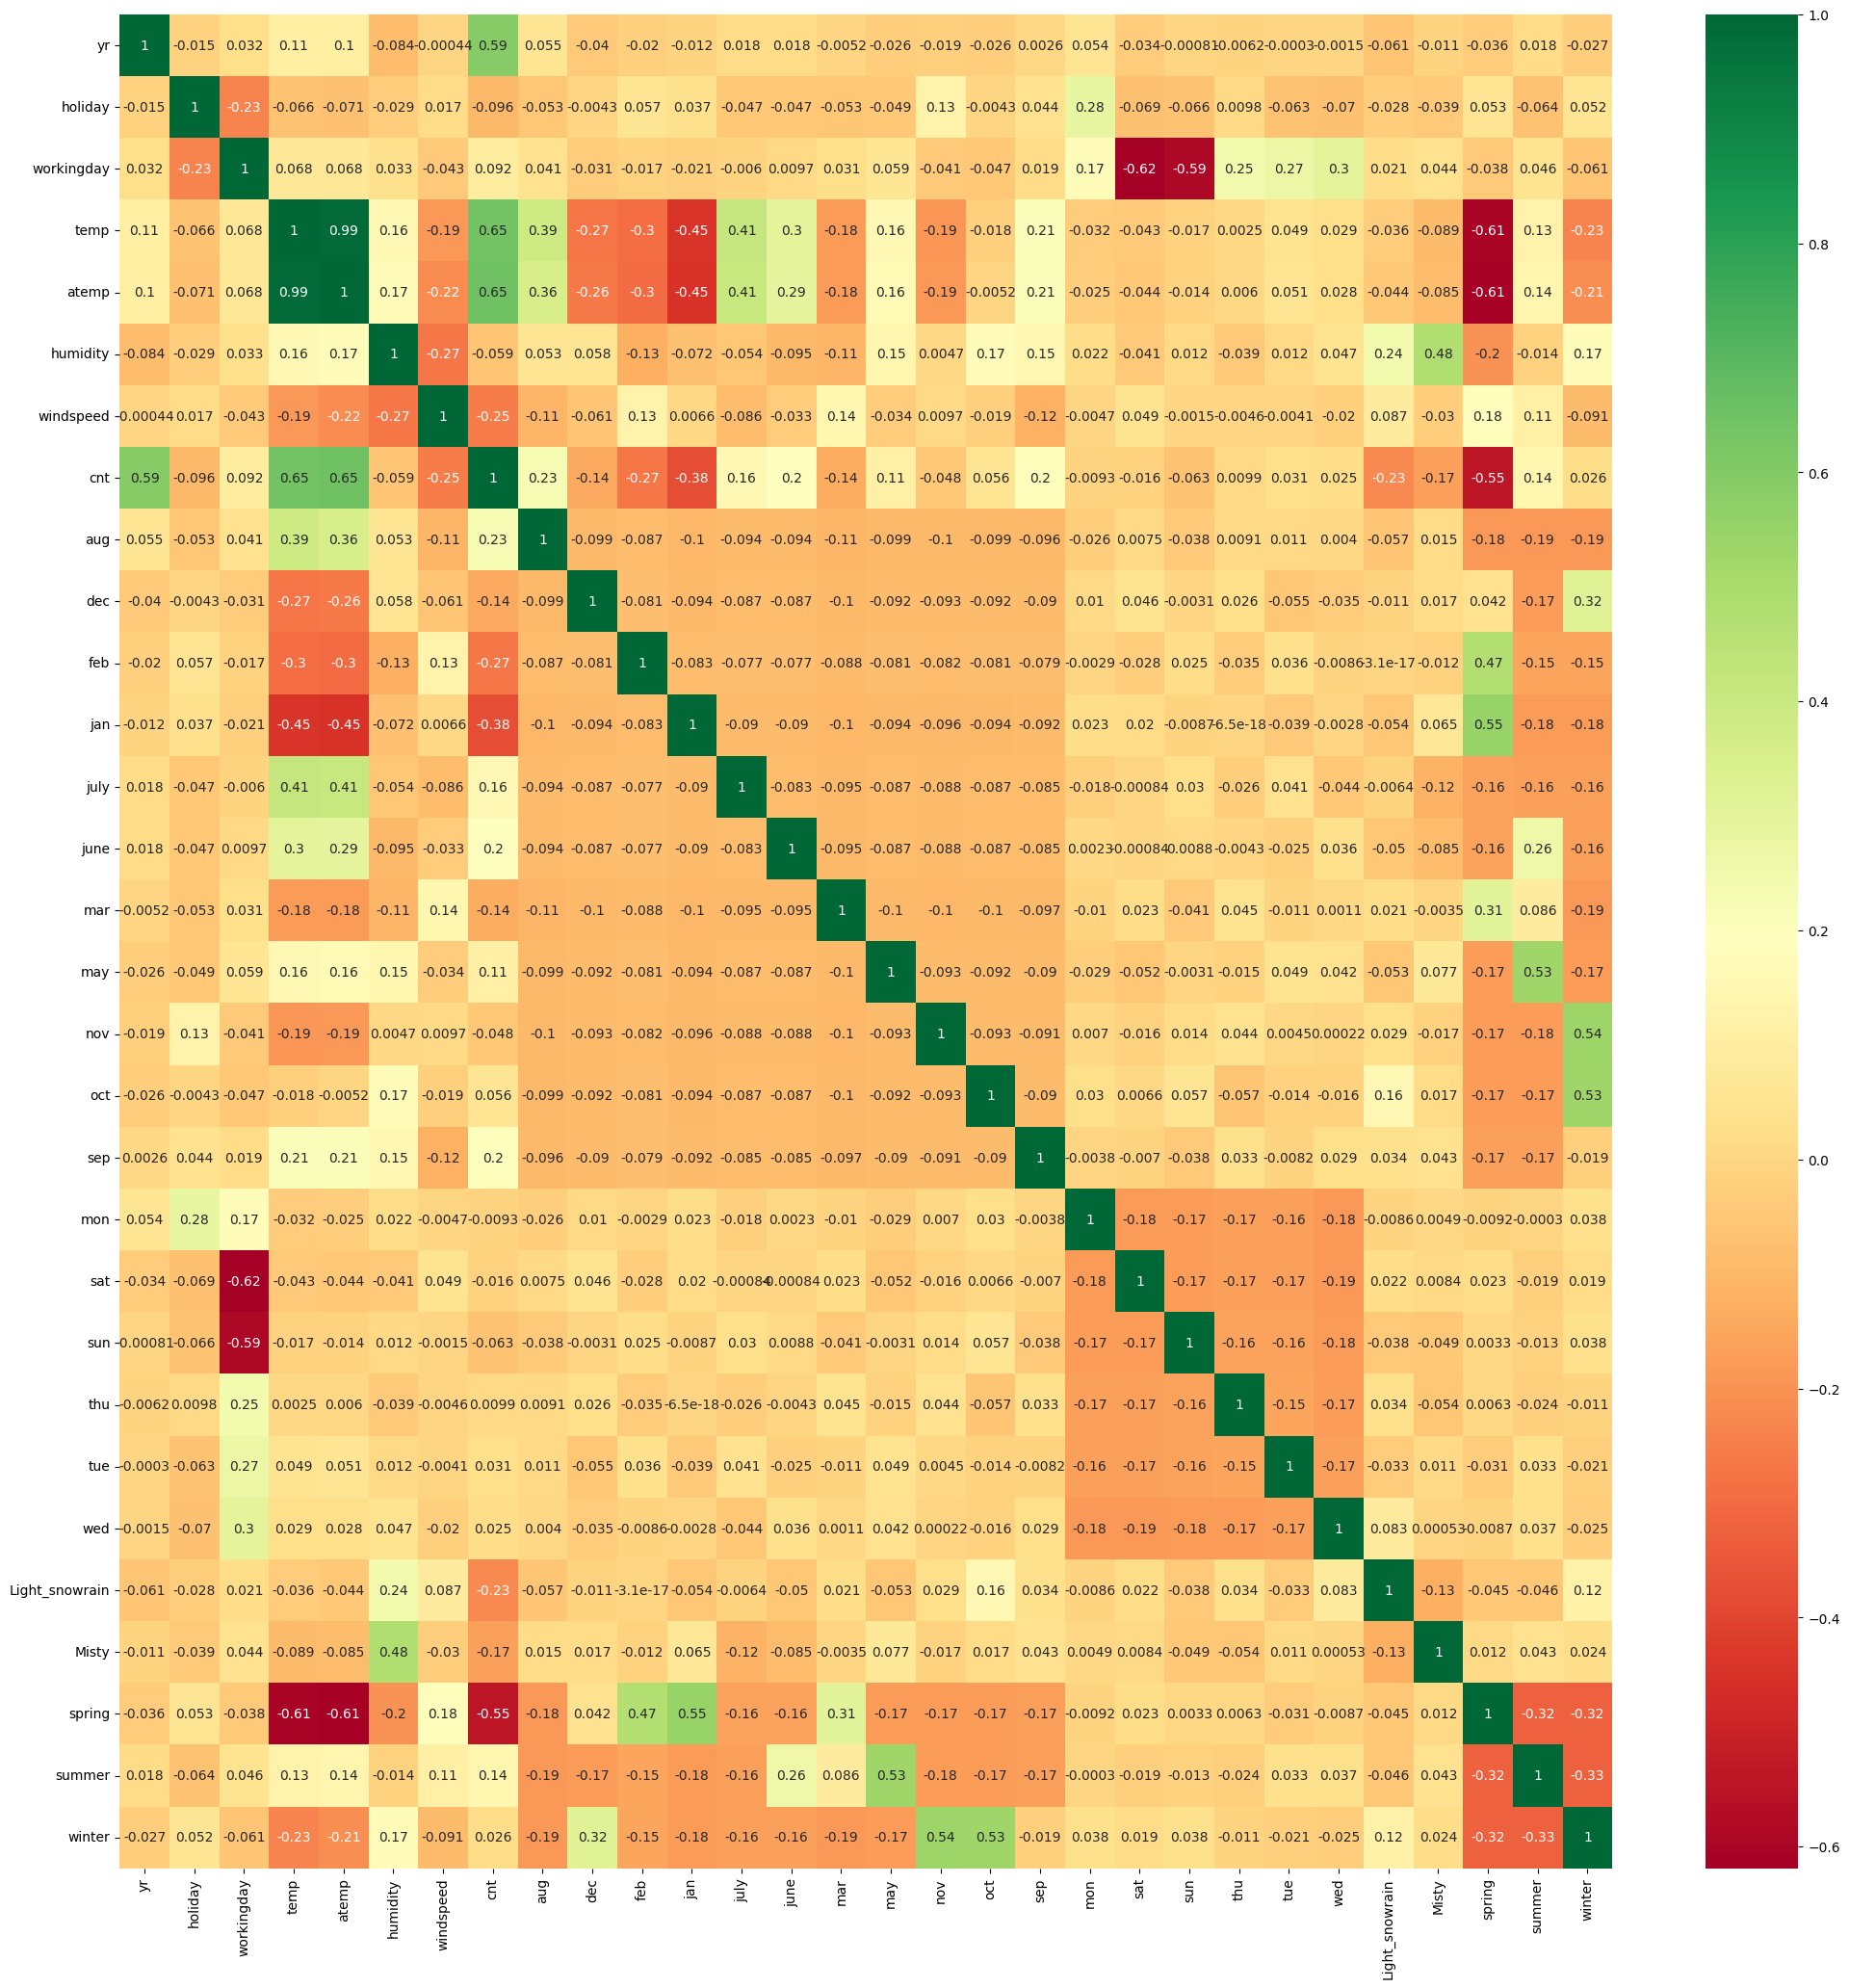

In [295]:
plt.figure(figsize = (25,25))
sns.heatmap(x_train.corr(), annot = True, cmap="RdYlGn")

In [296]:
y_train = x_train.pop('cnt')
X_train = x_train


In [ ]:
# Recursive feature elimination 

LRM = LinearRegression()
LRM_FIT=LRM.fit(X_train,y_train)
rfe = RFE(LRM, n_features_to_select=15)

RFE_fit = rfe.fit(X_train, y_train)

list(zip(X_train.columns,RFE_fit.support_,RFE_fit.ranking_))

In [298]:
col=list(X_train.columns[rfe.support_])
X_train_rfe=X_train[col]

In [299]:
#model building  statsmodel 
def statsmodel (df):
  X_train_sm=sm.add_constant(df)
  # create model object
  lr=sm.OLS(y_train,X_train_sm)
  # fit model and check parameters 
  LR_model=lr.fit()
  return LR_model.summary() , LR_model

summary , model = statsmodel(X_train_rfe)

In [ ]:
summary

In [ ]:
# function to calculate VIF 
def vif(df):
  vif = pd.DataFrame()
  X = df
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return  vif

vif(X_train_rfe)

## VIF is very high for "humidity" , will drop if first 

In [302]:
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)
## Again checking VIF and P value 

summary , model = statsmodel(X_train_rfe)
vif(X_train_rfe) ,summary

(          Features   VIF
 3             temp  7.07
 2       workingday  5.24
 4        windspeed  4.68
 11          spring  3.07
 12          summer  2.34
 0               yr  2.08
 13          winter  1.98
 8              sat  1.97
 5              jan  1.62
 6             july  1.59
 10           Misty  1.58
 7              sep  1.35
 1          holiday  1.17
 9   Light_snowrain  1.09,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.843
 Model:                            OLS   Adj. R-squared:                  0.838
 Method:                 Least Squares   F-statistic:                     189.6
 Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.60e-188
 Time:                        22:54:00   Log-Likelihood:                 510.75
 No. Observations:                 510   AIC:                            -991.5

In [303]:
X_train_rfe

,yr,holiday,workingday,temp,windspeed,jan,july,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.431816,0,0,0,1,0,1,0,0,1
79,0,0,1,0.462664,0.529881,0,0,0,0,0,1,0,1,0


#Model seems tune enogh , as no high P value and no abnormal VIF 

## Check for co-efficent agaist each feature

In [304]:
model.params

const             0.173669
yr                0.234461
holiday          -0.055784
workingday        0.046359
temp              0.472207
windspeed        -0.156254
jan              -0.039197
july             -0.047871
sep               0.075470
sat               0.058305
Light_snowrain   -0.290800
Misty            -0.081261
spring           -0.059888
summer            0.044507
winter            0.078366
dtype: float64

## Residual Analysis 

In [305]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
Y_predict=model.predict(X_train_rfe_sm)


<function matplotlib.pyplot.show(close=None, block=None)>

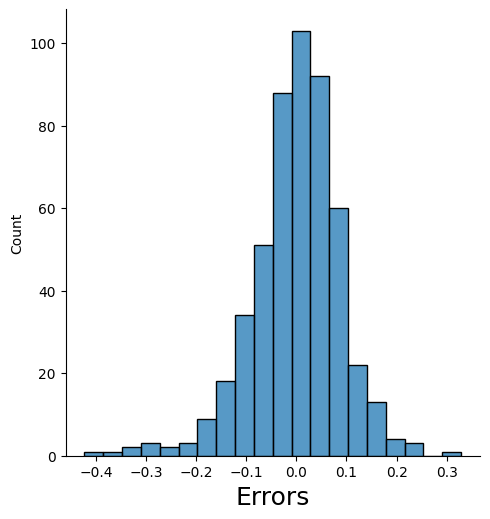

In [306]:
sns.displot(y_train-Y_predict,bins = 20)
plt.xlabel('Errors', fontsize = 18)   
plt.show

# Checking Homoscedasticity with train data result 

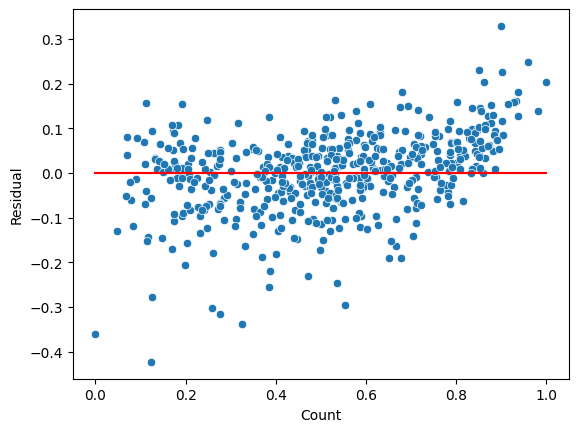

In [307]:
residual=y_train-Y_predict
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


##  Error is not evenly distributed at extreem right

In [308]:
r2 = r2_score(y_train, Y_predict)
Adjusted_R2 = 1-((1-r2)*(len(y_train)-1))/(len(y_train)-X_train_rfe.shape[1]-1)

round(r2,4) ,round(Adjusted_R2,4)

(0.8428, 0.8384)

#Predictions Using the developed Model

In [ ]:
# scaling Min Max
x_test[Cont_var] = scaler.transform(x_test[Cont_var])
x_test[Cont_var]

In [ ]:
x_test[Cont_var].describe()


In [311]:
y_test = x_test.pop('cnt')
X_test = x_test


In [ ]:
# Preparing input for model 
col_test=X_train_rfe.columns
X_test_sm = sm.add_constant(X_test[col_test])
X_test_sm

In [ ]:
# predicting target variable 
Y_test_predict=model.predict(X_test_sm)
Y_test_predict

<function matplotlib.pyplot.show(close=None, block=None)>

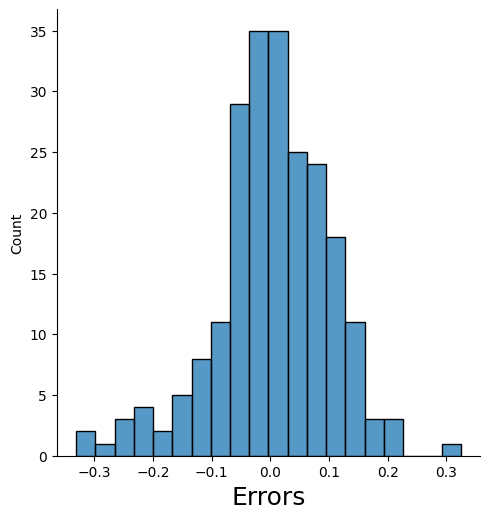

In [314]:
sns.displot(y_test-Y_test_predict,bins = 20)
plt.xlabel('Errors', fontsize = 18)   
plt.show

# Checking Homoscedasticity with test result 

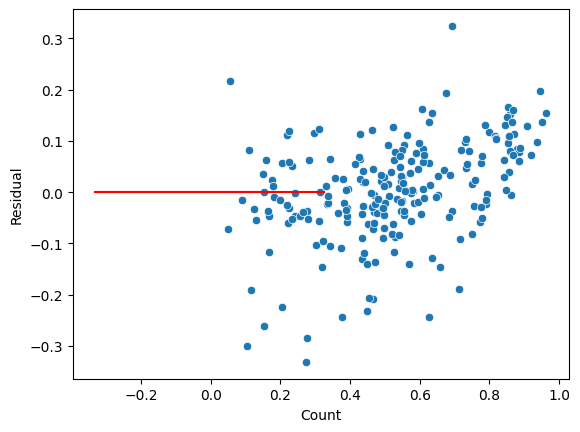

In [315]:
residual_test=y_test-Y_test_predict
sns.scatterplot(x=y_test,y=residual_test)
plt.plot(residual_test,(residual_test - residual_test), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


## y_test and y_pred  spread

Text(0, 0.5, 'Y_test_predict')

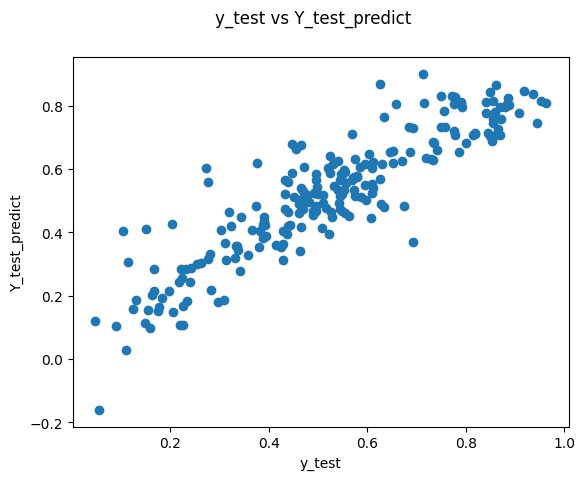

In [316]:


fig = plt.figure()
plt.scatter(y_test, Y_test_predict)
fig.suptitle('y_test vs Y_test_predict') 
plt.xlabel('y_test')
plt.ylabel('Y_test_predict' ) 

# Result accuracy prediction

# Calculation of R2_test and Adj_R2_test for test result 

In [317]:
r2_test = r2_score(y_test, Y_test_predict)
Adjusted_R2_test = 1-((1-r2)*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1)
r2_test  , Adjusted_R2_test

(0.8050495669880955, 0.8188325376407968)

In [318]:
print("Adjusted_R2_test is ", Adjusted_R2_test  )
print("Adjusted_R2_train is ", Adjusted_R2  )

Adjusted_R2_test is  0.8188325376407968
Adjusted_R2_train is  0.8383773323669708


In [319]:
print("R2_Test is ", r2_test  )
print("R2_train is ", r2  )

R2_Test is  0.8050495669880955
R2_train is  0.8428227495513763
